In [1]:
import pandas as pd
import datetime as dt
import pandasql as ps
import os
import zipfile as zp
from datetime import datetime
import matplotlib.pyplot as plt

DIR=r'C:\Users\anuj\Downloads'
ZIp='archive (8).zip'

os.chdir(DIR)
zf = zp.ZipFile(f'{ZIp}')

dfs={}
for name in zf.namelist():
    df_name= name.replace('.csv','')
    dfs[df_name]=pd.read_csv(zf.open(name,mode='r'),encoding='latin')

df=dfs['LS_2.0']
df.columns=df.columns.str.replace(' ','_')
df.columns=df.columns.str.replace('\n','_')
df['LIABILITIES']=df['LIABILITIES'].astype(str).apply(lambda x: x.replace('\n','-'))
df['ASSETS']=df['ASSETS'].astype(str).apply(lambda x: x.replace('\n','-'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].astype(str).apply(lambda x: x.replace('Not Available','0'))
df['CRIMINAL_CASES']=df['CRIMINAL_CASES'].apply(lambda x: float(x))
df['EDUCATION']=df['EDUCATION'].astype(str).apply(lambda x: x.replace('\n',''))

### Null and Duplicate Checks

In [2]:
df[df.duplicated()]## Check duplicates
df.isnull().values.any() ########Check NUlls
df.isnull().isnull().sum() ########Check NUlls by each column

STATE                                       0
CONSTITUENCY                                0
NAME                                        0
WINNER                                      0
PARTY                                       0
SYMBOL                                      0
GENDER                                      0
CRIMINAL_CASES                              0
AGE                                         0
CATEGORY                                    0
EDUCATION                                   0
ASSETS                                      0
LIABILITIES                                 0
GENERAL_VOTES                               0
POSTAL_VOTES                                0
TOTAL_VOTES                                 0
OVER_TOTAL_ELECTORS__IN_CONSTITUENCY        0
OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY    0
TOTAL_ELECTORS                              0
dtype: int64

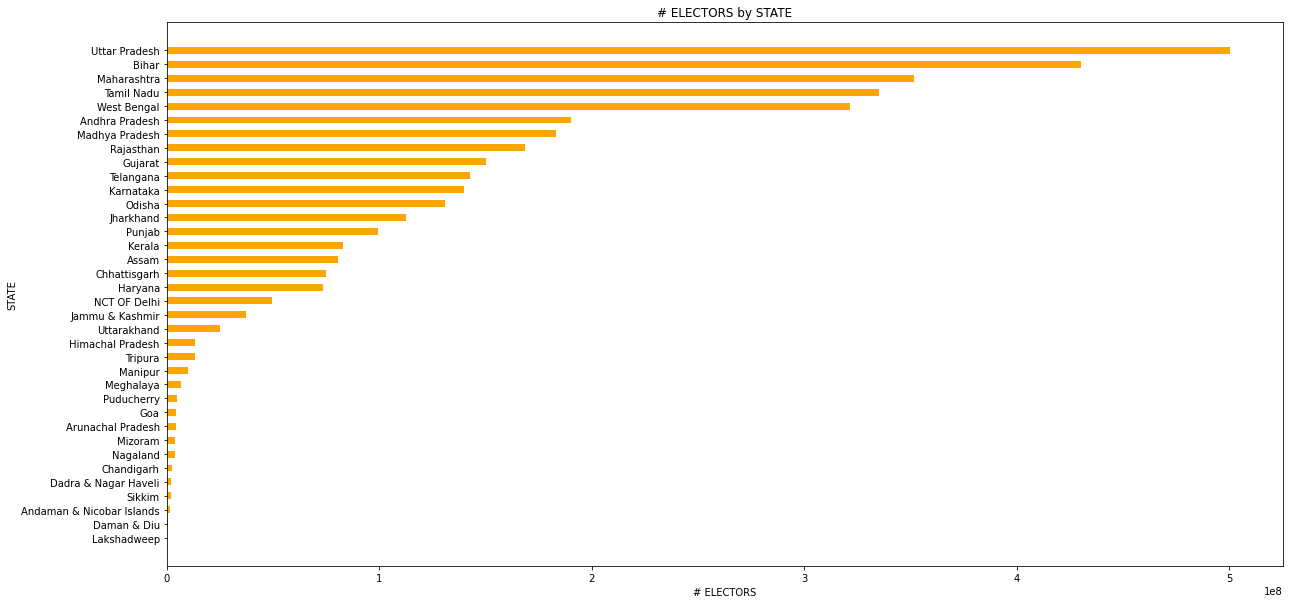

In [4]:
electors=pd.DataFrame(df['TOTAL_ELECTORS'].groupby(df['STATE']).sum()).sort_values(by='TOTAL_ELECTORS',ascending=True)
electors['STATE']=electors.index
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.barh(y=electors['STATE'].to_list(),width=electors['TOTAL_ELECTORS'].to_list(),height=0.5,color='orange')
plt.title('# ELECTORS by STATE')
plt.ylabel('STATE')
plt.xlabel('# ELECTORS')
plt.show()

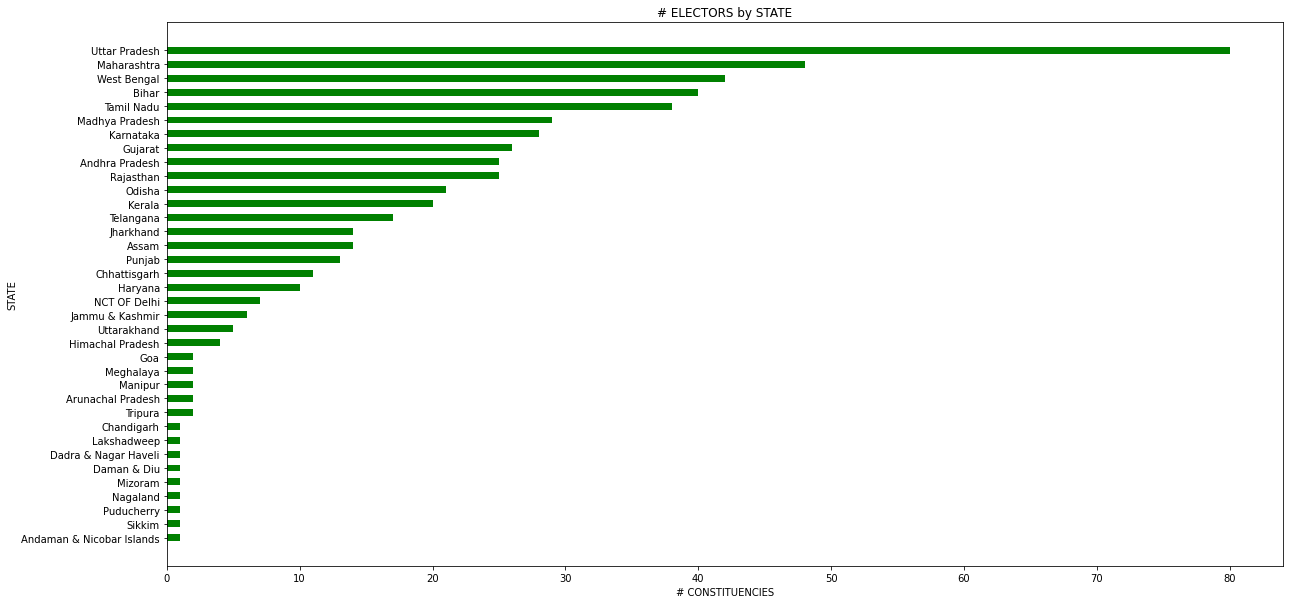

In [42]:
const=pd.DataFrame(df['CONSTITUENCY'].groupby(df['STATE']).nunique()).sort_values(by='CONSTITUENCY',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.barh(y=const['STATE'].to_list(),width=const['CONSTITUENCY'].to_list(),height=0.5,color='green')
plt.title('# ELECTORS by STATE')
plt.ylabel('STATE')
plt.xlabel('# CONSTITUENCIES')
plt.show()

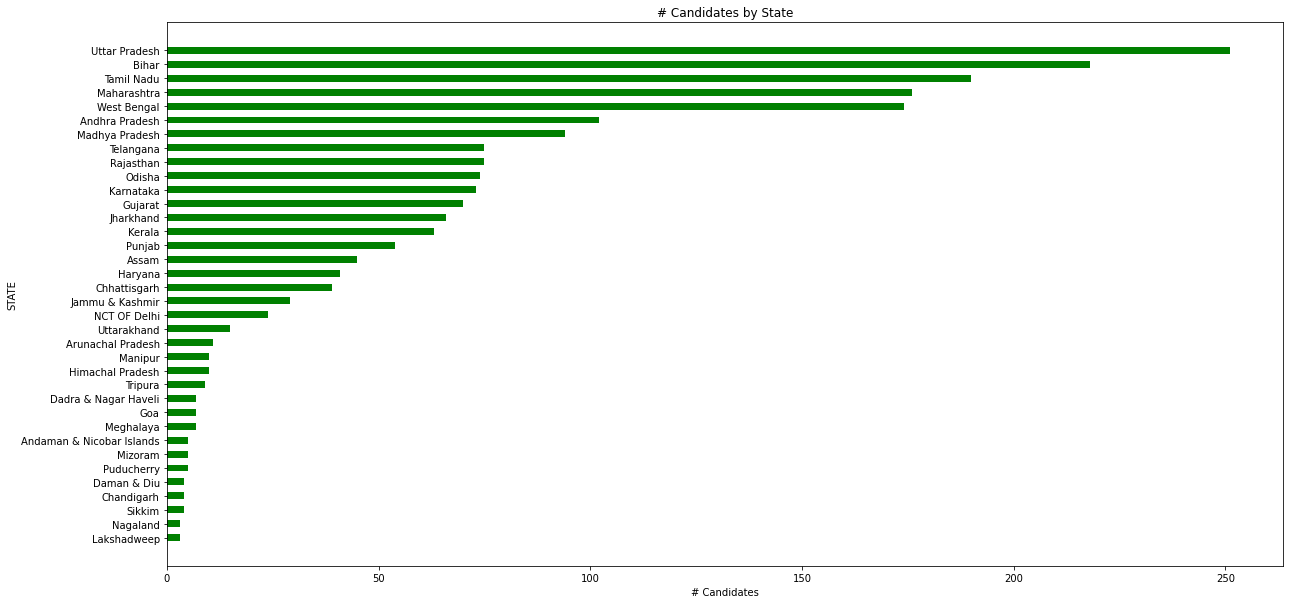

In [5]:
const=pd.DataFrame(df['NAME'].groupby(df['STATE']).nunique()).sort_values(by='NAME',ascending=True)
const['STATE']=const.index
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.barh(y=const['STATE'].to_list(),width=const['NAME'].to_list(),height=0.5,color='green')
plt.title('# Candidates by State')
plt.ylabel('STATE')
plt.xlabel('# Candidates')
plt.show()

Enter the State Name:Uttarakh


<AxesSubplot:title={'center':'Data '}, ylabel='EDUCATION'>

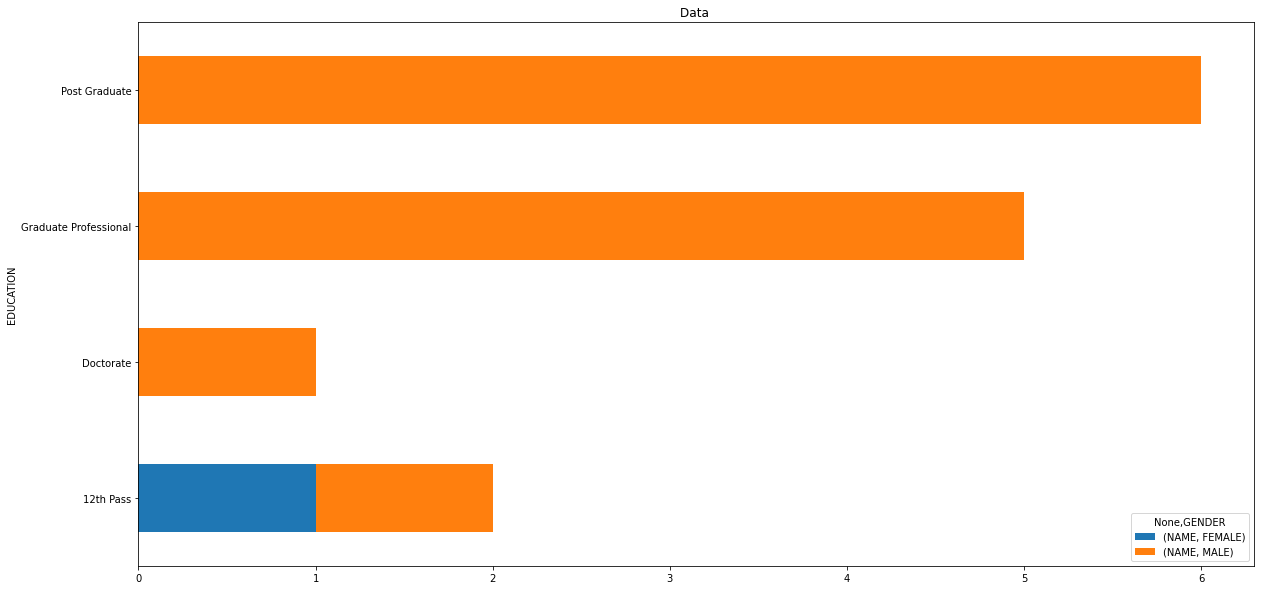

In [8]:
state = input('Enter the State Name:')
pd.DataFrame(df[df['STATE'].str.contains(state)]['NAME'].groupby([df['EDUCATION'],df['GENDER']]).nunique()).sort_values(by='NAME',ascending=True).unstack().plot(kind='barh',stacked=True,title="Data ",figsize=(20,10))

In [10]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL_VOTES,POSTAL_VOTES,TOTAL_VOTES,OVER_TOTAL_ELECTORS__IN_CONSTITUENCY,OVER_TOTAL_VOTES_POLLED__IN_CONSTITUENCY,TOTAL_ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414- ~ 30 Lacs+","Rs 2,31,450- ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888- ~ 1 Crore+","Rs 8,47,000- ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000- ~ 3 Crore+","Rs 1,53,00,000- ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036- ~ 7 Crore+","Rs 86,06,522- ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [19]:
df.ASSETS.unique()

array(['Rs 30,99,414- ~ 30 Lacs+', 'Rs 1,84,77,888- ~ 1 Crore+',
       'Rs 3,64,91,000- ~ 3 Crore+', ...,
       'Rs 1,28,78,51,556- ~ 128 Crore+', 'Rs 90,36,63,001- ~ 90 Crore+',
       'Rs 5,85,77,327- ~ 5 Crore+'], dtype=object)

### 1. How many candidates have criminial cases and have won elections? and in which state

### 2. Are there any female candidates with criminal cases ? which state shows this trend

### 3. Which state has most old candidates?

### 4. How many parties are there at National Level? Represent Them on a pie . Slices to be based on # Votes

### 5. Which state has most qualified Candidates?

### 6. Which party has most Gen category candidates?

### 7. Which state has the richest candidates? Which party do they belong to?

### 8. Which consituency was voted with highest NOTA?

### 9. In each state what is the turn-up percentage of voters?

### 10. Which state has the highest #female candidates?

### Are there any all male or all female candidates in a constituency?

### 11. What is the correlation b/w #candidates and #consituency?

### 12. Is there a scenario where in the states with low population density are using postal votes? Test the hypotheses

### 13. What is the highest difference of votes between loosing and winning candidate?

### 14. What is the lowest difference of votes between loosing and winning candidate?

### 15. Which candidate has the lowest net assets? Which constituecy they belong to?

### 16. What is most wierdest party symbol? Which constituency and in which state is it?

### 17. Which party has only female or only male candidates?

### 18. Which two or more parties have same symbol and what is the symbol?

### 19. Which state has most 18+ voters registered?

### 20. How many candidates have Gandhi as surname? and How many of then have actually won in their constituency?

### 21. Are people voting or even considering the education of the candidate?

In [22]:
dir(chart_studio.plotly)

['Stream',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'chunked_requests',
 'create_animations',
 'dashboard_ops',
 'file_ops',
 'get_config',
 'get_credentials',
 'get_figure',
 'get_grid',
 'grid_ops',
 'icreate_animations',
 'image',
 'iplot',
 'iplot_mpl',
 'meta_ops',
 'parse_grid_id_args',
 'plot',
 'plot_mpl',
 'plotly',
 'presentation_ops',
 'sign_in',
 'update_plot_options']